## Problem description 

The goal of this project was to classify music genre based on audio features. My data are audio features of tracks from a variety of genre playlist. The shape of one data point is (1,12). These audio features consists of danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness liveness, valence, tempo.
Only network layer and learning rate was modified for tuning.

## Data preparation

Data needed to be gathered first through spotify. The website 'everynoise.com' was used to collect playlist data for certain genres. The playlist data were collected and then the tracks ID. The IDs of the tracks were then used to get the audio feature of each track and adding it to pandas dataframe in order to be saved. 700 features were collected for each genre which came up to 7000. Data was split up into 80% training and 20% test.

```python

user = 'thesoundsofspotify'


featureslist = ['danceability', 'energy', 'key', 
                'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness','liveness',
                'valence', 'tempo', 'genre']


Genres = ['pop', 'edm', 'latin', 
          'rap', 'k-pop', 'rock',
          'hip hop', 'r&b', 'funk',
          'pop dance']

outputdict = {index: value for index, value in enumerate(Genres)}


URI = ['6gS3HhOiI17QNojjPuPzqc' , '1IGB0Uz7x2VY28qMagUC24', '3pDxuMpz94eDs7WFqudTbZ', 
       '6s5MoZzR70Qef7x4bVxDO1', '3T1Rft817cZ3pguTvaWaz3', '7dowgSWOmvdpwNkGFMUs6e',
       '6MXkE0uYF4XwU4VTtyrpfP', '1rLnwJimWCmjp3f0mEbnkY','0MBvtOIm5fuBbRHEltDY8A', 
       '2HhaArHsOiofpUheCRPkLa']
```


```python

playlist_tracks = []

#dataframe used to store the data points
features_df = pd.DataFrame()

#For every playlist and genre iterate through the playlist and collect the songs
for genre, uri in zip(outputdict.keys(), URI):

    #offset counter since spotify can obtain 100 tracks at a time
    offset_counter = 0 
    for i in range(7):

        #obtain the tracks
        tracklist = sp.user_playlist_tracks('user', playlist_id=uri, fields='items(track(id))', offset=offset_counter)
        # print(len(tracklist['items']))

        #append to tracks to a list
        for track in tracklist['items']:
            playlist_tracks.append(track['track']['id'])

        #obtain the features, only 100 at a time
        features = sp.audio_features(playlist_tracks[offset_counter:offset_counter+100])

        #append the genre to the feature dictionary
        for item in features:
            item.update( {'genre':genre})

        #append it to the dataframe
        features_df = features_df.append(features)

        #increase offset for the next batch
        offset_counter += 100

    playlist_tracks.clear()
        
```
        
## Benchmarking

Scikit learn's logistic classifier was used for benchmarking which a resulted in a 40% Train Accuracy and 38% Test Accuracy. For this the accuracy was compared during training and tuning.

## Training and tuning your network 

##### Run 1: layers: [12, 8, 10], alpha = 0.01
    Result : 10% train accuracy, 9% test accuracy
    
#### Run2: layers: [12,12,10,10], alpha: 0.001
    Result : 10% train accuracy, 9% test accuracy

#### Run 3: Removed some data, layer:[7, 7, 10], alpha = 0.01
    Decided to remove to some data to see what would happen since some of the data weren't scaled from 0 to 1 
    result: 37% train accuracy, 35% test accuracy

#### Run 4: Removed some data, layer:[7, 5, 7, 5, 10], alpha = 0.001
    result: 37% train accuracy, 35% test accuracy
    
#### Run 5: Normalized certain data, layers:[12, 10, 10, 10], alpha = 0.01
    result: 43% train accuracy, 40% test accuracy
    
#### Run 6: Normalized certain data, layers:[12, 12, 10, 10], alpha = 0.1
    Increased alpha just to see how far loss could go 
    Result 44% train accuracy, 38% test accuracy
    
#### Run 7: Normalized certain data, layers:[12, 12, 10, 10], alpha = 5
    Increased alpha just to be erratic
    Result: 39% Train accuracy, 36% Test Accuracy 
    
    
## Conclusions

To conclude, the overall accuracy of the classification was around 30% to 40% once the data has been normalized although data collection was bit tedious since the returns type of the API functions were a bit confusing.


### acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.	Float

### danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	Float


### duration_ms
The duration of the track in milliseconds.	Integer


### energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.	Float


### instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.	Float


### key
The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.	Integer


### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.	Float


### loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.	Float


### mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.	Integer


### speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.	Float
tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.	Float


### time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).	Integer

### valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	Float

In [3]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical


# Data Gathering

In [17]:
#Pop: spotify:playlist:6gS3HhOiI17QNojjPuPzqc

#Latin: spotify:playlist:1IGB0Uz7x2VY28qMagUC24

#EDM: spotify:playlist:3pDxuMpz94eDs7WFqudTbZ

client_id = '8b48033f1dd74bd7876d04d49c650020'
client_secret = 'c77f138f15024589be46205c28c54c1b'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


user = 'thesoundsofspotify'


featureslist = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'genre']


Genres = ['pop', 'edm', 'latin', 
          'rap', 'k-pop', 'rock',
          'hip hop', 'r&b', 'funk',
          'pop dance']

outputdict = {index: value for index, value in enumerate(Genres)}


URI = ['6gS3HhOiI17QNojjPuPzqc' , '1IGB0Uz7x2VY28qMagUC24', '3pDxuMpz94eDs7WFqudTbZ', 
       '6s5MoZzR70Qef7x4bVxDO1', '3T1Rft817cZ3pguTvaWaz3', '7dowgSWOmvdpwNkGFMUs6e',
       '6MXkE0uYF4XwU4VTtyrpfP', '1rLnwJimWCmjp3f0mEbnkY','0MBvtOIm5fuBbRHEltDY8A', 
       '2HhaArHsOiofpUheCRPkLa']


In [ ]:
testlist = []
# for genre, uri in zip(Genres[0], URI[0]):
    # for i in range(8):
# print(genre)
tracklist = sp.user_playlist_tracks('user', playlist_id=URI[0], fields='items(track(id))', offset=0)
for track in tracklist['items']:
    testlist.append(track['track']['id'])
featurestest = sp.audio_features(testlist)

# featurestest[0]['genre'] = Genres[0]

for item in featurestest:
    item.update( {'genre':Genres[0]})
    
print(featurestest[0])
        
dataframetest = pd.DataFrame(featurestest)
dataframetest

# dataframetest.iloc[0]
dataframetest.drop(columns = ['type', 'id', 'uri', 'track_href','analysis_url','duration_ms']) 

dataframetest['genre']


In [ ]:
'''API examples    https://buildmedia.readthedocs.org/media/pdf/spotipy/latest/spotipy.pdf '''

# birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
# # sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
# results = sp.artist_albums(birdy_uri, album_type='album')
# albums = results['items']
# while results['next']:
#     results = spotify.next(results)
#     albums.extend(results['items'])

# for album in albums:
#     print(album['name'])

#list to append tracks
playlist_tracks = []

#dataframe used to store the data points
features_df = pd.DataFrame()

#For every playlist and genre iterate through the playlist and collect the songs
for genre, uri in zip(outputdict.keys(), URI):
    
    #offset counter since spotify can obtain 100 tracks at a time
    offset_counter = 0 
    for i in range(7):
        
        #obtain the tracks
        tracklist = sp.user_playlist_tracks('user', playlist_id=uri, fields='items(track(id))', offset=offset_counter)
        # print(len(tracklist['items']))
        
        #append to tracks to a list
        for track in tracklist['items']:
            playlist_tracks.append(track['track']['id'])
            
        #obtain the features, only 100 at a time
        features = sp.audio_features(playlist_tracks[offset_counter:offset_counter+100])
            
        #append the genre to the feature dictionary
        for item in features:
            item.update( {'genre':genre})
            
        #append it to the dataframe
        features_df = features_df.append(features)
        
        #increase offset for the next batch
        offset_counter += 100
            
    playlist_tracks.clear()
        


In [23]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.666,0.796,10,-6.967,0,0.1030,0.04920,0.000000,0.0442,0.6100,110.108,4,0
1,0.516,0.467,0,-6.184,1,0.0302,0.66200,0.000000,0.0853,0.3860,132.861,4,0
2,0.573,0.739,0,-5.740,1,0.1290,0.02850,0.000000,0.1110,0.4510,97.085,4,0
3,0.259,0.437,11,-6.589,0,0.0386,0.10200,0.000001,0.1060,0.0951,180.042,4,0
4,0.386,0.426,3,-6.642,1,0.0363,0.80700,0.000000,0.1400,0.2610,180.104,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.647,0.932,11,-3.515,1,0.0824,0.00383,0.000002,0.0574,0.3740,114.991,4,9
6996,0.910,0.961,7,-5.941,1,0.1660,0.00320,0.880000,0.0404,0.1670,128.035,4,9
6997,0.630,0.839,6,-3.971,0,0.0422,0.03130,0.537000,0.1220,0.6240,127.980,4,9
6998,0.789,0.638,11,-7.515,0,0.0450,0.17100,0.033700,0.2740,0.4270,117.026,4,9


In [ ]:
# print(features[0])

features_df = features_df.drop(columns = ['type', 'id', 'uri', 'track_href','analysis_url','duration_ms']) 

In [ ]:
features_df.columns
# features_df.drop(columns = ['Name'])

In [ ]:
features_df.to_csv('data.csv',index = False, header=True)

# Feed forward, parameters: layers & alpha 

In [5]:
class FeedforwardNeuralNetwork:
    
    # input a vector [a, b, c, ...] with the number of nodes in each layer
    def __init__(self, layers, alpha = 0.1):
        
        # list of weight matrices between layers
        self.W = []
        
        # network architecture will be a vector of numbers of nodes for each layer
        self.layers = layers
        
        # learning rate
        self.alpha = alpha
        
        # initialize the weights (randomly) -- this is our initial guess for gradient descent
        
        # initialize the weights between layers (up to the next-to-last one) as normal random variables
        for i in np.arange(0, len(layers) - 2):
            self.W.append(np.random.randn(layers[i] + 1, layers[i + 1] + 1))
            
        # initialize weights between the last two layers (we don't want bias for the last one)
        self.W.append(np.random.randn(layers[-2] + 1, layers[-1]))
        
    # define the sigmoid activation
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # define the sigmoid derivative (where z is the output of a sigmoid)
    def sigmoidDerivative(self, z):
        return z * (1 - z)
    
    # fit the model
    def fit(self, X, y, epochs = 10000, update = 1000):
        # add a column of ones to the end of X
        X = np.hstack((X, np.ones([X.shape[0],1])))

        for epoch in np.arange(0,epochs):

            # feed forward, backprop, and weight update
            for (x, target) in zip(X, y):
                
                # make a list of output activations from the first layer
                # (just the original x values)
                A = [np.atleast_2d(x)]
                
                # feed forward
                for layer in np.arange(0, len(self.W)):
                    
                    # feed through one layer and apply sigmoid activation
                    net = A[layer].dot(self.W[layer])
                    out = self.sigmoid(net)
                    
                    # add our network output to the list of activations
                    A.append(out)
                    
                # backpropagation
                error = A[-1] - target
                
                # term proportional to the gradient
                D = [error * self.sigmoidDerivative(A[-1])]
                
                # loop backwards over the layers to build up deltas
                for layer in np.arange(len(A) - 2, 0, -1):
                    delta = D[-1].dot(self.W[layer].T)
                    delta = delta * self.sigmoidDerivative(A[layer])
                    D.append(delta)
                    
                # reverse the deltas since we looped in reverse
                D = D[::-1]
                
                # weight update
                for layer in np.arange(0, len(self.W)):
                    self.W[layer] -= self.alpha * A[layer].T.dot(D[layer])
                    
            # print a status update
            if (epoch + 1) % update == 0:
                loss = self.computeLoss(X,y)
                print('Epoch =', epoch + 1, 'loss = ', loss)
                
    def predict(self, X, addOnes = True):
        # initialize data, be sure it's the right dimension
        p = np.atleast_2d(X)
        
        # add a column of 1s for bias
        if addOnes:
            p = np.hstack((p, np.ones([X.shape[0],1])))
        
        # feed forward!
        for layer in np.arange(0, len(self.W)):
            p = self.sigmoid(np.dot(p, self.W[layer]))
         
        # return the predictions
        return p
    
    def computeLoss(self, X, y):
        # initialize data, be sure it's the right dimension
        y = np.atleast_2d(y)
        
        # feed the datapoints through the network to get predicted outputs
        predictions = self.predict(X, addOnes = False)
        
        # compute the sum of squared errors loss function
        loss = np.sum((predictions - y)**2) / 2.0
        
        return loss

# Input process

In [4]:
features_df = pd.read_csv('data.csv')

og_data = features_df.to_numpy()

def dataprocess(data):
    
    X = data[:, :-1]
    y = data[:, -1]

    (trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.2, random_state = 1)

    # devX, testX, devY, testY = train_test_split(testX, testY, test_size = 0.5)
    
    trainY = to_categorical(trainY)
    # devY = to_categorical(devY)
    testY = to_categorical(testY)
    
    print('trainX ', trainX.shape)
    # print('devX ', devX.shape)
    print('testX ', testX.shape)
    print('trainY ', trainY.shape)
    # print('devY ', devY.shape)
    print('testY ', testY.shape)


    return trainX, trainY, testX, testY

In [7]:
trainX, trainY, testX, testY = dataprocess(og_data)
# label_encoder = LabelEncoder()
# vec = label_encoder.fit_transform(trainY)
print(trainY[0])

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Benchmark

40% Train Accuracy 

38% Test Accuracy

In [8]:
from sklearn.linear_model import LogisticRegression, LinearRegression

X = og_data[:, :-1]
y = og_data[:, -1]

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.2, random_state = 1)

log = LogisticRegression(max_iter=10000).fit(trainX, trainY)

print("Training set accuracy")

prediction = log.predict(trainX)

print(classification_report(trainY, prediction))

print("Test set accuracy")

prediction = log.predict(testX)

print(classification_report(testY, prediction))




Training set accuracy
              precision    recall  f1-score   support

         0.0       0.24      0.17      0.20       577
         1.0       0.34      0.36      0.35       565
         2.0       0.44      0.41      0.42       559
         3.0       0.39      0.35      0.36       544
         4.0       0.41      0.55      0.47       554
         5.0       0.48      0.55      0.51       561
         6.0       0.44      0.43      0.44       552
         7.0       0.35      0.33      0.34       565
         8.0       0.51      0.52      0.52       549
         9.0       0.30      0.30      0.30       574

    accuracy                           0.40      5600
   macro avg       0.39      0.40      0.39      5600
weighted avg       0.39      0.40      0.39      5600

Test set accuracy
              precision    recall  f1-score   support

         0.0       0.20      0.15      0.17       123
         1.0       0.35      0.39      0.37       135
         2.0       0.42      0.37     

# Testing

### Run 1: layers: [12, 8, 10], alpha = 0.01
    Result : 10% train accuracy, 9% test accuracy

In [9]:
trainX, trainY, testX, testY = dataprocess(og_data)


model = FeedforwardNeuralNetwork([12, 8, 10], alpha = 0.01)
model.fit(trainX,trainY,1000,100)

# print the classification performance
print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2519.9655926903865
Epoch = 200 loss =  2519.950754533292
Epoch = 300 loss =  2519.9346679122277
Epoch = 400 loss =  2519.996067299663
Epoch = 500 loss =  2519.9338768166253
Epoch = 600 loss =  2519.9841059169776
Epoch = 700 loss =  2519.9096455818963
Epoch = 800 loss =  2519.977159099386
Epoch = 900 loss =  2519.9324273239176
Epoch = 1000 loss =  2519.9983955081407
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.00      0.00      0.00       565
           2       0.00      0.00      0.00       559
           3       0.00      0.00      0.00       544
           4       0.00      0.00      0.00       554
           5       0.00      0.00      0.00       561
           6       0.00      0.00      0.00       552
           7       0.00      0.00      0.00       565
           8       0.00      

/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/

### Run2: layers: [12,12,10,10], alpha: 0.001
    Result : 10% train accuracy, 9% test accuracy

In [11]:

trainX, trainY, testX, testY = dataprocess(og_data)


model = FeedforwardNeuralNetwork([12,12,10,10], alpha = 0.001)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2519.683610456394
Epoch = 200 loss =  2519.3342136542715
Epoch = 300 loss =  2518.7453047067042
Epoch = 400 loss =  2518.283443755804
Epoch = 500 loss =  2517.0814332572436
Epoch = 600 loss =  2489.8229478096387
Epoch = 700 loss =  2462.9040206204563
Epoch = 800 loss =  2449.3717130699906
Epoch = 900 loss =  2439.864920256509
Epoch = 1000 loss =  2432.2149848040845
Training set accuracy
              precision    recall  f1-score   support

           0       0.15      0.07      0.09       577
           1       0.16      0.07      0.10       565
           2       0.20      0.08      0.12       559
           3       0.00      0.00      0.00       544
           4       0.25      0.58      0.35       554
           5       0.00      0.00      0.00       561
           6       0.09      0.04      0.06       552
           7       0.16      0.03      0.05       565
           8       0.21      

/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/

### Run 3: Removed some data, layer:[7, 7, 10], alpha = 0.01
    Decided to remove to some data just to see what would happen and saw an increase in accuracy
    result: 37% train accuracy, 35% test accuracy
    

In [12]:
list_initial = ['key','mode','loudness','tempo', 'time_signature']

test_data = features_df.drop(columns = list_initial)
test_data = test_data.to_numpy()


In [13]:
trainX, trainY, testX, testY = dataprocess(test_data)

model = FeedforwardNeuralNetwork([7, 7, 10], alpha = 0.01)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 7)
testX  (1400, 7)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2246.779610853082
Epoch = 200 loss =  2176.9692382475137
Epoch = 300 loss =  2159.5301931012123
Epoch = 400 loss =  2151.9225820671736
Epoch = 500 loss =  2146.3726699462927
Epoch = 600 loss =  2141.5038516938293
Epoch = 700 loss =  2137.1318466868925
Epoch = 800 loss =  2133.1987677965863
Epoch = 900 loss =  2129.6450947141047
Epoch = 1000 loss =  2126.4025433145434
Training set accuracy
              precision    recall  f1-score   support

           0       0.25      0.10      0.14       577
           1       0.33      0.34      0.33       565
           2       0.42      0.39      0.41       559
           3       0.39      0.41      0.40       544
           4       0.33      0.44      0.38       554
           5       0.48      0.52      0.50       561
           6       0.41      0.41      0.41       552
           7       0.30      0.39      0.34       565
           8       0.42      

### Run 4: Removed some data, layer:[7, 5, 7, 5, 10], alpha = 0.001
    result: 37% train accuracy, 35% test accuracy

In [14]:
trainX, trainY, testX, testY = dataprocess(test_data)

model = FeedforwardNeuralNetwork([7, 5, 7, 5, 10], alpha = 0.001)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 7)
testX  (1400, 7)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2519.916419241603
Epoch = 200 loss =  2519.1678850638136
Epoch = 300 loss =  2518.1461851408026
Epoch = 400 loss =  2516.252141448254
Epoch = 500 loss =  2511.829217255362
Epoch = 600 loss =  2501.1370167309665
Epoch = 700 loss =  2476.6484121450135
Epoch = 800 loss =  2443.3493598335826
Epoch = 900 loss =  2423.092069056383
Epoch = 1000 loss =  2409.1508368835675
Training set accuracy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       577
           1       0.17      0.12      0.14       565
           2       0.25      0.75      0.38       559
           3       0.25      0.40      0.31       544
           4       0.00      0.00      0.00       554
           5       0.14      0.10      0.12       561
           6       0.00      0.00      0.00       552
           7       0.16      0.02      0.04       565
           8       0.18      0.6

/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Mjhon/miniforge3/lib/

### Used original data and normalized values where the range is not [0,1].

In [7]:
data = features_df

normalized_data = data

normalized_data['tempo'] = (data['tempo'] - data['tempo'].min())/ (data['tempo'].max() - data['tempo'].min())

normalized_data['loudness'] = (data['loudness'] - data['loudness'].min())/ (data['loudness'].max() - data['loudness'].min())

normalized_data['key'] = (data['key'] - data['key'].min())/ (data['key'].max() - data['key'].min())

normalized_data['time_signature'] = (data['time_signature'] - data['time_signature'].min())/ (data['time_signature'].max() - data['time_signature'].min())

# normalized_data.iloc[200]

data = normalized_data

normalized_data = normalized_data.to_numpy()

normalized_data[0]
# (df - df.min()) / (df.max() - df.min()

array([0.666     , 0.796     , 0.90909091, 0.62390335, 0.        ,
       0.103     , 0.0492    , 0.        , 0.0442    , 0.61      ,
       0.37039842, 0.75      , 0.        ])

### Run 5: Normalized certain data, layers:[12, 10, 10, 10], alpha = 0.01
    result: 43% train accuracy, 40% test accuracy

In [16]:
trainX, trainY, testX, testY = dataprocess(normalized_data)

model = FeedforwardNeuralNetwork([12, 10, 10, 10], alpha = 0.01)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2146.3753889310506
Epoch = 200 loss =  2064.9010711629303
Epoch = 300 loss =  2035.4889626484055
Epoch = 400 loss =  2020.495053942826
Epoch = 500 loss =  2011.5488660922524
Epoch = 600 loss =  2005.3105368506301
Epoch = 700 loss =  2000.32668567493
Epoch = 800 loss =  1995.9133984588873
Epoch = 900 loss =  1991.8163012638124
Epoch = 1000 loss =  1988.0302678944472
Training set accuracy
              precision    recall  f1-score   support

           0       0.28      0.19      0.22       577
           1       0.39      0.39      0.39       565
           2       0.45      0.39      0.42       559
           3       0.38      0.46      0.41       544
           4       0.47      0.58      0.52       554
           5       0.61      0.57      0.59       561
           6       0.46      0.42      0.44       552
           7       0.37      0.42      0.39       565
           8       0.52      

### Run 6: Normalized certain data, layers:[12, 12, 10, 10], alpha = 0.1
    Increased alpha just to see how far loss could go 
    Result 44% train accuracy, 38% test accuracy

In [17]:
trainX, trainY, testX, testY = dataprocess(normalized_data)

model = FeedforwardNeuralNetwork([12, 12, 10, 10], alpha = 0.1)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2042.605234334362
Epoch = 200 loss =  1992.4094482875123
Epoch = 300 loss =  1973.5526202837864
Epoch = 400 loss =  1958.674727537888
Epoch = 500 loss =  1951.410946624433
Epoch = 600 loss =  1946.8272036928383
Epoch = 700 loss =  1944.99740072689
Epoch = 800 loss =  1943.3299989822829
Epoch = 900 loss =  1939.7031143050876
Epoch = 1000 loss =  1935.582078719667
Training set accuracy
              precision    recall  f1-score   support

           0       0.29      0.17      0.21       577
           1       0.40      0.49      0.44       565
           2       0.49      0.36      0.42       559
           3       0.45      0.36      0.40       544
           4       0.51      0.59      0.55       554
           5       0.62      0.60      0.61       561
           6       0.48      0.49      0.48       552
           7       0.31      0.47      0.38       565
           8       0.53      0.6

### Run 7: Normalized certain data, layers:[12, 12, 10, 10], alpha = 5
    Increased alpha just to be erratic
    Result: 39% Train accuracy, 36% Test Accuracy 

In [24]:
trainX, trainY, testX, testY = dataprocess(normalized_data)

model = FeedforwardNeuralNetwork([12, 12, 10, 10], alpha = 5)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2140.09449751574
Epoch = 200 loss =  2140.8102237063385
Epoch = 300 loss =  2135.561629973998
Epoch = 400 loss =  2093.1242716190045
Epoch = 500 loss =  2134.609898217429
Epoch = 600 loss =  2171.7286894817125
Epoch = 700 loss =  2105.0725444717646
Epoch = 800 loss =  2119.148945420636
Epoch = 900 loss =  2127.1025930292813
Epoch = 1000 loss =  2111.8020735034406
Training set accuracy
              precision    recall  f1-score   support

           0       0.21      0.46      0.29       577
           1       0.38      0.23      0.29       565
           2       0.43      0.47      0.45       559
           3       0.33      0.39      0.36       544
           4       0.48      0.56      0.52       554
           5       0.50      0.58      0.54       561
           6       0.46      0.43      0.44       552
           7       0.44      0.22      0.29       565
           8       0.55      0.

In [8]:
trainX, trainY, testX, testY = dataprocess(normalized_data)

model = FeedforwardNeuralNetwork([12, 10, 10, 10], alpha = 0.01)
model.fit(trainX,trainY,1000,100)

print("Training set accuracy")

predictedY = model.predict(trainX)
predictedY = predictedY.argmax(axis=1)

trainY = trainY.argmax(axis=1)

print(classification_report(trainY, predictedY))

print("Test set accuracy")

predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)

testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

trainX  (5600, 12)
testX  (1400, 12)
trainY  (5600, 10)
testY  (1400, 10)
Epoch = 100 loss =  2155.6257704354393
Epoch = 200 loss =  2060.4207143163985
Epoch = 300 loss =  2039.9167381307213
Epoch = 400 loss =  2029.5593948624562
Epoch = 500 loss =  2022.3645500596904
Epoch = 600 loss =  2016.6679788921203
Epoch = 700 loss =  2011.7927408382648
Epoch = 800 loss =  2007.470906306486
Epoch = 900 loss =  2003.582521555277
Epoch = 1000 loss =  2000.100008272014
Training set accuracy
              precision    recall  f1-score   support

           0       0.28      0.13      0.18       577
           1       0.38      0.39      0.39       565
           2       0.46      0.40      0.43       559
           3       0.40      0.45      0.42       544
           4       0.45      0.60      0.51       554
           5       0.62      0.55      0.58       561
           6       0.45      0.42      0.44       552
           7       0.34      0.45      0.39       565
           8       0.49      

In [32]:

demoY = model.predict(testX[450:451])

demoY = demoY.argmax()

realY = testY.argmax()

print("Predicted: {0} \t\tReal: {1}".format(demoY, realY))

print("Predicted: {0} \tReal: {1}".format(outputdict[demoY], outputdict[realY]))


Predicted: 8 		Real: 7
Predicted: funk 	Real: r&b


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
genre,,,,,,,,,,,,
0,0.651753,0.620995,0.488442,0.654543,0.617143,0.078707,0.244612,0.016001,0.164433,0.482066,0.421386,0.737143
1,0.705686,0.706087,0.474545,0.658327,0.641429,0.077614,0.276023,0.003756,0.169062,0.682151,0.444745,0.743929
2,0.627796,0.798774,0.472857,0.717642,0.507143,0.078282,0.069612,0.130917,0.201419,0.389735,0.472304,0.745000
3,0.759464,0.650291,0.493247,0.625084,0.515714,0.196098,0.131108,0.005188,0.198466,0.546871,0.417047,0.747857
4,0.648021,0.736623,0.481429,0.755027,0.588571,0.079648,0.242656,0.001683,0.189893,0.552977,0.432888,0.744643
5,0.516477,0.714673,0.457403,0.579105,0.718571,0.054402,0.137927,0.056975,0.188666,0.560091,0.464161,0.736786
6,0.747073,0.666504,0.495584,0.598605,0.518571,0.210546,0.144930,0.018467,0.206679,0.599598,0.371567,0.749643
7,0.679476,0.571006,0.513636,0.598818,0.470000,0.098014,0.228237,0.003837,0.157753,0.528840,0.395273,0.743214
8,0.670241,0.609391,0.509610,0.498981,0.557143,0.064478,0.267574,0.109022,0.170133,0.702590,0.405113,0.741071


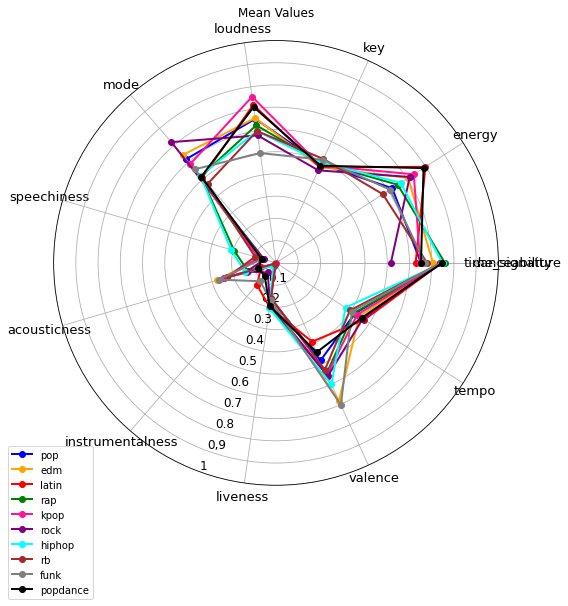

In [28]:
from math import pi
import matplotlib.pyplot as plt

# def createRadar(player, data):
#     Attributes = featureslist
    
#     data += data [:1]
    
#     angles = [n / 6 * 2 * pi for n in range(6)]
#     angles += angles [:1]
    
#     ax = plt.subplot(111, polar=True)

#     plt.xticks(angles[:-1],Attributes)
#     ax.plot(angles,data)
#     ax.fill(angles, data, 'blue', alpha=0.1)

#     ax.set_title(player)
#     plt.show()


# plotdata = {'pop': {},
#         'edm' : {}, 
#         'latin' : {},
#         'rap' : {},
#         'k-pop' : {},
#         'rock' : {},
#         'hip hop' : {},
#         'r&b' : {},
#         'funk' : {},
#         'pop dance' :{}}

plottest = data.groupby('genre').mean()


# source: https://towardsdatascience.com/visualizing-spotify-songs-with-python-an-exploratory-data-analysis-fc3fae3c2c09
# for plotting the radiograph


labels = list(plottest)[:]
pop = plottest.iloc[0].tolist()
edm = plottest.iloc[1].tolist()
latin = plottest.iloc[2].tolist()
rap = plottest.iloc[3].tolist()
kpop = plottest.iloc[4].tolist()
rock = plottest.iloc[5].tolist()
hiphop= plottest.iloc[6].tolist()
rb = plottest.iloc[7].tolist()
funk = plottest.iloc[8].tolist()
popdance = plottest.iloc[9].tolist()


angles = np.linspace(0, 2*np.pi, len(labels), endpoint=True)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, pop, 'o-', linewidth=2, label = "pop", color= 'blue')
# ax.fill(angles, pop, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0,9', '1'], size=12)
plt.ylim(0,1)

ax.plot(angles, edm, 'o-', linewidth=2, label = "edm", color= 'orange')

ax.plot(angles, latin, 'o-', linewidth=2, label = "latin", color= 'red')

ax.plot(angles, rap, 'o-', linewidth=2, label = "rap", color= 'green')

ax.plot(angles, kpop, 'o-', linewidth=2, label = "kpop", color= 'deeppink')

ax.plot(angles, rock, 'o-', linewidth=2, label = "rock", color= 'purple')

ax.plot(angles, hiphop, 'o-', linewidth=2, label = "hiphop", color= 'cyan')

ax.plot(angles, rb, 'o-', linewidth=2, label = "rb", color= 'brown')

ax.plot(angles, funk, 'o-', linewidth=2, label = "funk", color= 'gray')

ax.plot(angles, popdance, 'o-', linewidth=2, label = "popdance", color= 'black')


ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

# Attributes =list(plottest)
# AttNo = len(Attributes)

# values = data.iloc[0].tolist()
# values += values [:0]
# angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
# angles += angles [:0]

# ax = plt.subplot(111, polar=True)

# #Add the attribute labels to our axes
# plt.xticks(angles[:-1],Attributes)



# values
plottest